<a href="https://colab.research.google.com/github/deep1003/deep1003/blob/master/Sentence_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# # import os, sys
# from google.colab import drive
# drive.mount('/gdrive')

In [51]:
# # !pip install --target=$my_path pycountry
# !pip install pycountry
# import pycountry

In [52]:
# #1. 환경 설정 및 필요 패키지 설치
# #먼저 Python 환경에서 필요한 패키지를 설치해야 합니다. 다음과 같이 필요한 패키지를 설치합니다.
# !pip install sentence-transformers
# !pip install numpy
# !pip install pandas
# !pip install scikit-learn

In [53]:
# 기본적인 라이브러리 불러오기
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import re


In [54]:
#2. Sentence-BERT 모델 로드
# sentence-transformers 라이브러리를 사용하여 SBERT 모델을 로드합니다. 일반적으로 'paraphrase-MiniLM-L6-v2'와 같은 사전 학습된 모델을 많이 사용합니다.
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')


In [55]:
# 1. 데이터 로드 및 전처리
# CSV 파일을 pandas로 로드하고, 특허 초록과 특허 번호를 추출합니다.
url = "https://raw.githubusercontent.com/deep1003/deep1003/master/patent_healthcare.csv"
df = pd.read_csv(url, delimiter=';', encoding='utf-8')


In [56]:
# 특허 초록을 리스트로 저장
patent_texts = df['appln_abstract'].tolist()
# 특허 id를 리스트로 저장
patent_ids = df['appln_id'].tolist()

In [57]:
# 정규 표현식을 사용하여 리스트의 각 요소에서 숫자와 괄호 제거
import re
cleaned_patent_texts = [re.sub(r'\(\d+\)', '', text) for text in patent_texts]


In [58]:
# 2. 문장 임베딩 생성
# SBERT 모델을 사용하여 특허 초록 텍스트의 임베딩을 생성합니다.
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(cleaned_patent_texts, convert_to_tensor=True)
embeddings_np = embeddings.cpu().numpy()


In [59]:
embeddings_np

array([[-0.37980872, -0.09706926, -0.1725322 , ...,  0.38965434,
        -0.07396524, -0.16349775],
       [-0.37980872, -0.09706926, -0.1725322 , ...,  0.38965434,
        -0.07396524, -0.16349775],
       [-0.04589153,  0.06785159, -0.17961226, ...,  0.1596903 ,
         0.05403631, -0.25529492],
       ...,
       [-0.51728857,  0.14906643, -0.18269628, ..., -0.05661731,
         0.39219576,  0.23266879],
       [-0.29222682, -0.3379644 , -0.26159275, ..., -0.16523969,
         0.31781703, -0.23301071],
       [-0.51815593, -0.17881782, -0.31446335, ...,  0.602468  ,
        -0.17761803, -0.02880482]], dtype=float32)

In [60]:
# 3. 특허 간 유사성 계산
# 생성된 임베딩을 이용하여 특허 문서 간의 코사인 유사도를 계산합니다.
cosine_similarities = cosine_similarity(embeddings_np)


In [61]:
# 4. 클러스터링
# KMeans 알고리즘을 사용하여 문서 임베딩을 기반으로 클러스터링을 수행합니다.

num_clusters = 5  # 클러스터의 개수를 설정
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(embeddings_np)
cluster_assignments = clustering_model.labels_



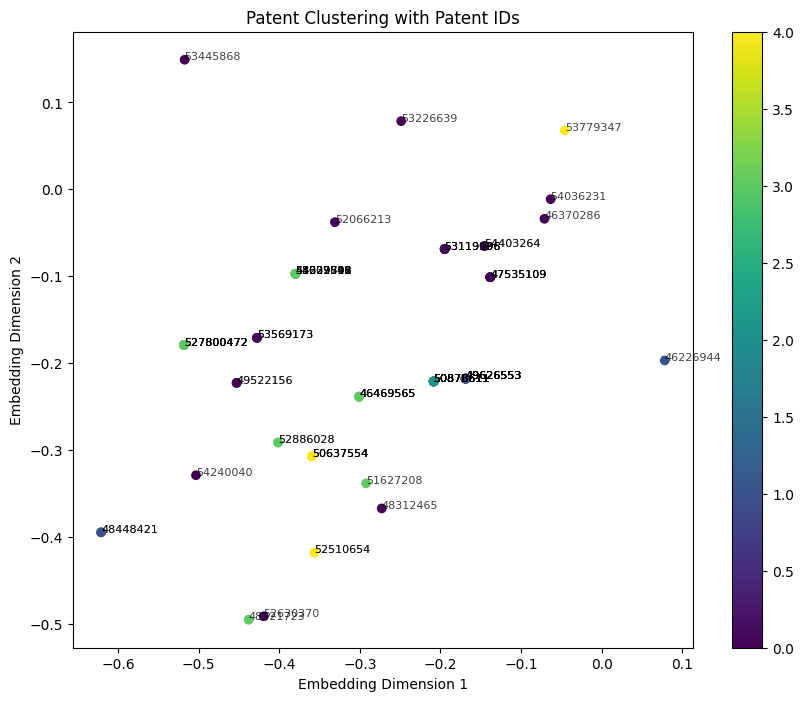

In [62]:
# 5. 클러스터링 결과 시각화 (특허 번호 표시 포함)
# 클러스터링된 문서들을 2차원 공간에 시각화하고, 각 점에 특허 번호를 라벨로 표시합니다.
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_np[:, 0], embeddings_np[:, 1], c=cluster_assignments, cmap='viridis')

# 각 점에 해당하는 특허 번호를 라벨로 추가
for i, txt in enumerate(patent_ids):
    plt.annotate(txt, (embeddings_np[i, 0], embeddings_np[i, 1]), fontsize=8, alpha=0.75)

plt.title('Patent Clustering with Patent IDs')
plt.xlabel('Embedding Dimension 1')
plt.ylabel('Embedding Dimension 2')
plt.colorbar(scatter)
plt.show()